In [1]:
from tdavec.TDAvectorizer import createEllipse, TDAvectorizer

Hello from tdavec


In [2]:
from tdavec.TDAvectorizer import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Here I am creating some sample point cloud

In [3]:
def createCircle(n = 100, x0=0, y0=0, r=1, eps = 0.1):
    phi = np.random.uniform(0,2*np.pi,n)
    rho = np.random.uniform(1-eps,1+eps,n)
    x = x0 + r * rho * np.cos(phi)
    y = y0 + r * rho * np.sin(phi)
    return np.vstack([x,y]).T
def createTwoCircles(n = 100, rat = 0.5, r = 1, eps = 0.1):
    X1 = createCircle(int(n), x0=0, y0 = rat*r, r = rat*r, eps = eps)
    X2 = createCircle(int(n), x0=0, y0 = -(1-rat)*r, r = (1-rat)*r, eps = eps)
    return np.vstack([X1, X2])


Let us look at some sample clouds

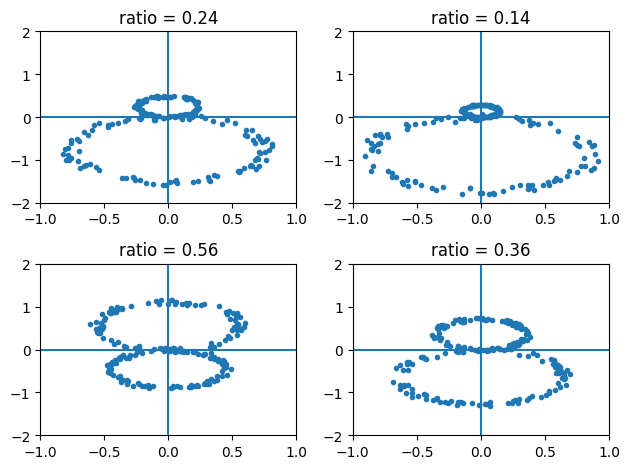

In [4]:
# creating data set
np.random.seed(5234)
ratList = np.random.uniform(0.1, 0.9, 500)
clouds = []
for ratio in ratList:
    clouds = clouds + [createTwoCircles(n = 100, rat = ratio, r = 1, eps = 0.1)]
for i, X in enumerate(clouds[:4]):
    plt.subplot(2,2,i+1)
    plt.plot(X[:,0],X[:,1],'.')
    plt.xlim(-1,1); plt.ylim(-2,2)
    plt.axhline(0); plt.axvline(0)
    plt.title("ratio = {:.2f}".format(ratList[i]))
plt.tight_layout()

In [5]:
vect = TDAvectorizer()
vect.setParams({"inf":None})
vect.fit(clouds)


Here are some of the PDs

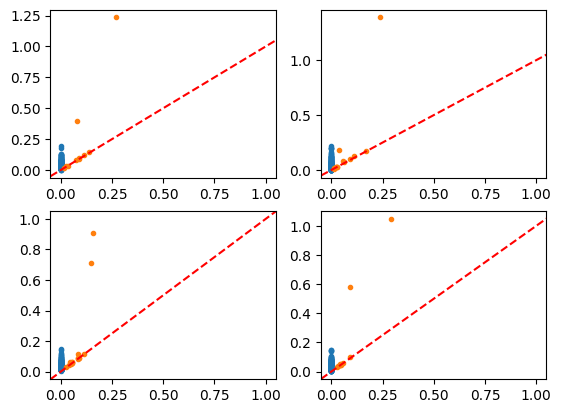

In [7]:
for i, D in enumerate(vect.diags[:4]):
    plt.subplot(2,2,i+1)
    plt.plot(D[0][:,0],D[0][:,1],'.')
    plt.plot(D[1][:,0],D[1][:,1],'.')
    plt.axline((0,0), (1,1), color="r",linestyle="dashed")

In [8]:
vect.setParams({"scale": np.linspace(0, 2, 20)})

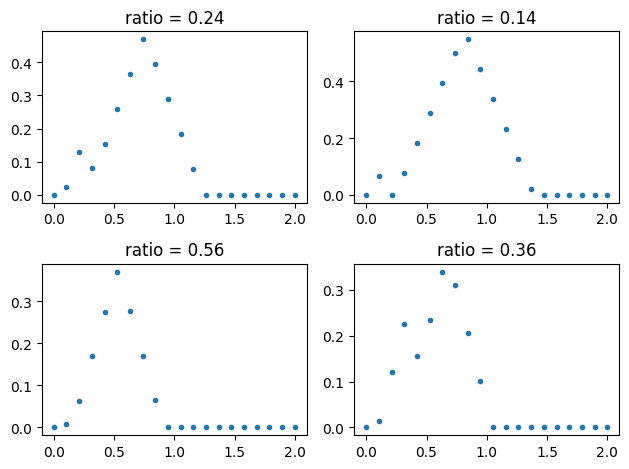

In [9]:
X = vect.transform(homDim=1, output="PL")
for i, x in enumerate(X[:4]):
    plt.subplot(2,2,i+1)
    plt.plot(vect.getParams()["scale"],x,'.')
    plt.title("ratio = {:.2f}".format(ratList[i]))
plt.tight_layout()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, ratList, test_size=0.8, random_state=42)
model = LinearRegression().fit(X_train, y_train)

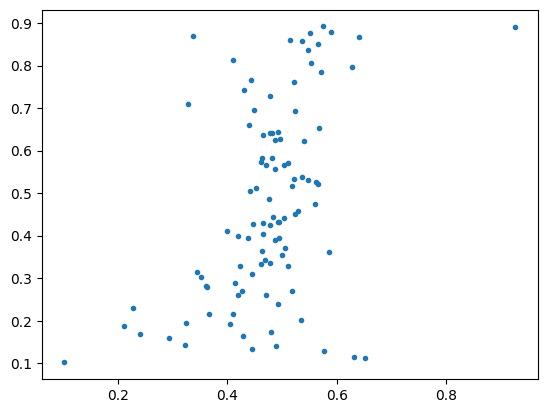

In [11]:
train_preds = model.predict(X_train)
plt.plot(train_preds, y_train, '.')

(0.0, 1.0)

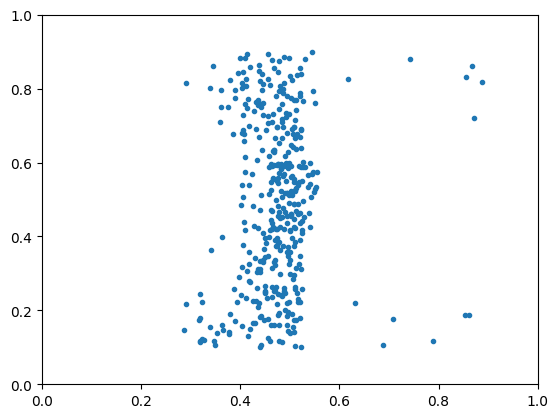

In [43]:
plt.plot(model.predict(X_test), y_test, ".")
plt.xlim(0, 1)
plt.ylim(0, 1)

In [22]:
y_train.shape

(335,)